In [7]:
import pandas as pd
import numpy as np
low_memory=False

In [8]:
df = pd.read_csv(r'/home/ariana/projetos/analise/df/df2014_df2018.csv', delimiter=',')

In [10]:
df.head()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,25,2014,Masculino,Desvinculado do curso,ANALISE E DESENVOLVIMENTO DE SISTEMAS
1,29,2014,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS
2,27,2014,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS
3,29,2014,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS
4,33,2014,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [11]:
df.isnull().sum()

IDADE       0
ANO         0
SEXO        0
SITUACAO    0
CURSO       0
dtype: int64

In [12]:
df['CURSO'].unique()

array(['ANALISE E DESENVOLVIMENTO DE SISTEMAS', 'COMPUTACAO',
       'INFORMATICA', 'TECNOLOGIA DA INFORMACAO'], dtype=object)

In [14]:
masc = df[df['SEXO'] == 'Masculino'] 
femi = df[df['SEXO'] == 'Feminino']

In [19]:
id_si_cu_masc = masc[['IDADE', 'SITUACAO', 'CURSO'] ]
id_si_cu_femi = femi[['IDADE', 'SITUACAO', 'CURSO'] ]

In [20]:
masc_avg = id_si_cu_masc['IDADE'].mean()
femi_avg = id_si_cu_femi['IDADE'].mean()

print("Media da idade dos homens", masc_avg)
print("Media da idade das mulheres:", femi_avg)

Media da idade dos homens 27.519913997356575
Media da idade das mulheres: 27.083729711175405


In [21]:
df.describe()

,IDADE,ANO
count,779082.000000,779082.000000
mean,27.451409,2016.128550
std,7.623588,1.420129
min,16.000000,2014.000000
25%,22.000000,2015.000000
50%,26.000000,2016.000000
75%,32.000000,2017.000000
max,84.000000,2018.000000


In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

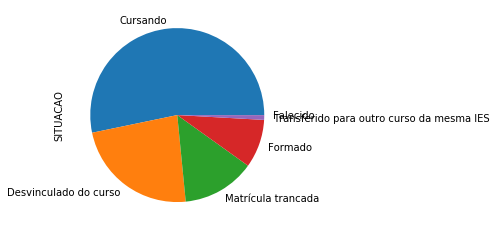

In [23]:
df["SITUACAO"].value_counts().plot.pie()

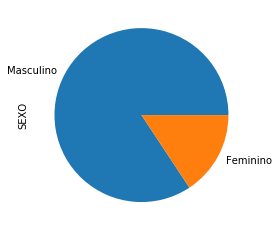

In [24]:
df["SEXO"].value_counts().plot.pie()

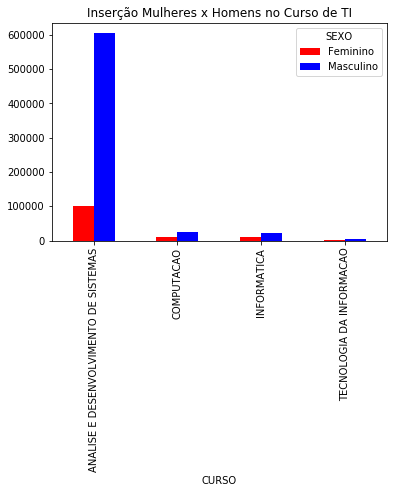

In [26]:
curso_sexo = pd.crosstab(df['CURSO'],df['SEXO'])
curso_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Inserção Mulheres x Homens no Curso de TI')

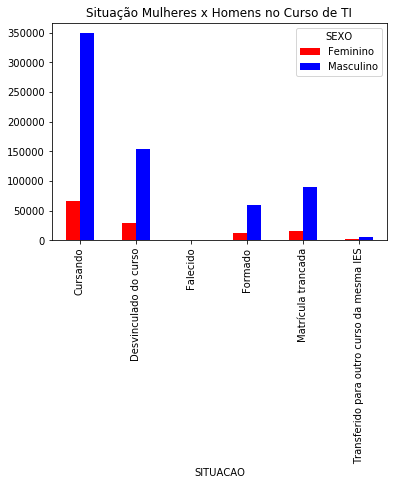

In [28]:
situacao_sexo = pd.crosstab(df['SITUACAO'],df['SEXO'])
situacao_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Situação Mulheres x Homens no Curso de TI')

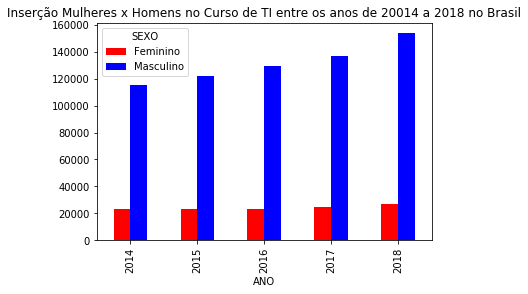

In [30]:
curso_ano = pd.crosstab(df['ANO'],df['SEXO'])
curso_ano.plot(kind='bar',width=0.5, color=['red','blue'], title='Inserção Mulheres x Homens no Curso de TI entre os anos de 20014 a 2018 no Brasil' ,grid=False)